In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [40]:
df_raw = pd.read_csv('data/sw_grade.csv', index_col = 'class_number')

In [116]:
df_raw["등급"] = df_raw["grade"].apply(lambda x: 'Challenger' if x > 4 else 'Dia' if x > 3.5 else 'Platinum' if x > 3.0
                                    else 'Gold' if x > 2.5
                                    else 'Silver' if x > 2.0 else 'Bronze')


In [117]:
df_raw

,..1,grade,평점,C_test,activity,Coding,Teamwork,Math,score,등급
class_number,,,,,,,,,,
s1374,1,1.875000,0.0,0,111,1.750000,2.500000,1.000000,33.875000,Bronze
s821,2,1.375000,1.0,111,111,1.166667,1.000000,1.166667,44.773333,Bronze
s388,3,1.937500,1.0,111,111,1.850000,3.000000,1.375000,45.037500,Bronze
s399,4,1.850000,2.0,222,111,2.000000,1.500000,1.666667,56.150000,Bronze
s684,5,1.973684,2.5,278,111,1.868421,3.500000,2.333333,61.823860,Bronze
s1457,6,2.416667,0.0,0,222,2.000000,2.000000,2.250000,67.290000,Silver
s826,7,2.437500,0.0,0,222,2.000000,2.500000,2.500000,67.325000,Silver
s1004,8,2.526316,0.0,0,222,2.333333,3.000000,2.500000,67.450000,Gold
s1137,9,2.285714,0.0,0,222,2.700000,2.500000,1.833333,67.501667,Silver


In [118]:
del df_raw['..1']
del df_raw['score']
del df_raw['C_test']
del df_raw['평점']

In [119]:
from sklearn.preprocessing import LabelEncoder
n_convert = LabelEncoder()
df_y_converted = n_convert.fit_transform(df_raw['등급'])

In [121]:
from sklearn.preprocessing import StandardScaler
df_x = df_raw.iloc[:,0:5]
scaler = StandardScaler()
scaler.fit(df_x)
df_x_scaled = DataFrame(scaler.transform(df_x))


C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """


In [144]:
print(df_y_converted[0]) # Bronze
print(df_y_converted[1007]) # Dia
print(df_y_converted[1008]) # Challenger
print(df_y_converted[5]) # Silver
print(df_y_converted[22]) # Gold
# 0 5 3 4 2 1

0
2
1
5
3


In [123]:
df_x.describe()

,grade,activity,Coding,Teamwork,Math
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,3.256209,307.653543,3.260074,3.407050,3.067150
std,0.479880,61.838866,0.559622,0.725454,0.703704
min,1.375000,111.000000,1.000000,1.000000,1.000000
25%,2.939302,222.000000,2.888889,3.000000,2.583333
50%,3.250000,333.000000,3.271780,3.500000,3.100000
75%,3.592728,333.000000,3.666667,4.000000,3.600000
max,4.446429,444.000000,4.500000,4.500000,4.500000


In [124]:
from sklearn.model_selection import train_test_split
df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(df_x_scaled, df_y_converted, test_size=0.4, random_state=13)


In [125]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import metrics
k_range = range(1,len(df_x_train.iloc[:,0]))
scores = {}
scores_list = [] 
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df_x_train, df_y_train)
    y_pred = knn.predict(df_x_test)
    scores[k] = metrics.accuracy_score(df_y_test, y_pred)
    scores_list.append(metrics.accuracy_score(df_y_test, y_pred))
    print("Classification Report for k={}: \n{}\n".format(k, classification_report(df_y_test, y_pred)))


Classification Report for k=1: 
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.94      1.00      0.97        16
           2       0.91      0.94      0.92        98
           3       0.91      0.90      0.91        94
           4       0.95      0.94      0.95       172
           5       0.70      0.70      0.70        23

   micro avg       0.92      0.92      0.92       407
   macro avg       0.90      0.87      0.88       407
weighted avg       0.92      0.92      0.92       407


Classification Report for k=2: 
              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       0.89      1.00      0.94        16
           2       0.82      0.95      0.88        98
           3       0.89      0.95      0.92        94
           4       0.96      0.86      0.91       172
           5       0.82      0.61      0.70        23

   micro avg

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=11: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.94      0.93      0.93        98
           3       0.93      0.96      0.94        94
           4       0.95      0.97      0.96       172
           5       0.76      0.70      0.73        23

   micro avg       0.93      0.93      0.93       407
   macro avg       0.75      0.76      0.75       407
weighted avg       0.92      0.93      0.93       407


Classification Report for k=12: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.90      0.94      0.92        98
           3       0.92      0.96      0.94        94
           4       0.96      0.94      0.95       172
           5       0.75      0.65      0.70        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=20: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.91      0.93      0.92        98
           3       0.92      0.96      0.94        94
           4       0.95      0.95      0.95       172
           5       0.75      0.65      0.70        23

   micro avg       0.92      0.92      0.92       407
   macro avg       0.74      0.75      0.74       407
weighted avg       0.91      0.92      0.92       407


Classification Report for k=21: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.91      0.93      0.92        98
           3       0.92      0.96      0.94        94
           4       0.95      0.95      0.95       172
           5       0.75      0.65      0.70        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=28: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.91      0.94      0.92        98
           3       0.90      0.96      0.93        94
           4       0.96      0.95      0.95       172
           5       0.72      0.57      0.63        23

   micro avg       0.92      0.92      0.92       407
   macro avg       0.73      0.73      0.73       407
weighted avg       0.91      0.92      0.91       407


Classification Report for k=29: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.92      0.92      0.92        98
           3       0.90      0.96      0.93        94
           4       0.95      0.95      0.95       172
           5       0.72      0.57      0.63        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=37: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.92      0.91      0.91        98
           3       0.87      0.96      0.91        94
           4       0.94      0.95      0.95       172
           5       0.73      0.48      0.58        23

   micro avg       0.91      0.91      0.91       407
   macro avg       0.73      0.72      0.72       407
weighted avg       0.90      0.91      0.90       407


Classification Report for k=38: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.91      0.92      0.91        98
           3       0.88      0.96      0.92        94
           4       0.95      0.95      0.95       172
           5       0.69      0.48      0.56        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=46: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.91      0.90        98
           3       0.83      0.97      0.90        94
           4       0.94      0.94      0.94       172
           5       0.67      0.26      0.38        23

   micro avg       0.89      0.89      0.89       407
   macro avg       0.70      0.68      0.68       407
weighted avg       0.88      0.89      0.88       407


Classification Report for k=47: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.91      0.91      0.91        98
           3       0.84      0.97      0.90        94
           4       0.94      0.95      0.94       172
           5       0.70      0.30      0.42        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=53: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.92      0.90        98
           3       0.82      0.97      0.89        94
           4       0.95      0.94      0.94       172
           5       0.57      0.17      0.27        23

   micro avg       0.89      0.89      0.89       407
   macro avg       0.69      0.67      0.66       407
weighted avg       0.87      0.89      0.87       407


Classification Report for k=54: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.93      0.91        98
           3       0.82      0.97      0.89        94
           4       0.95      0.94      0.94       172
           5       0.57      0.17      0.27        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=60: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.92      0.90        98
           3       0.81      0.97      0.88        94
           4       0.95      0.94      0.94       172
           5       0.60      0.13      0.21        23

   micro avg       0.89      0.89      0.89       407
   macro avg       0.69      0.66      0.65       407
weighted avg       0.87      0.89      0.87       407


Classification Report for k=61: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.92      0.90        98
           3       0.81      0.97      0.88        94
           4       0.95      0.94      0.94       172
           5       0.50      0.13      0.21        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=69: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.92      0.90        98
           3       0.78      0.97      0.86        94
           4       0.95      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.88      0.88      0.88       407
   macro avg       0.58      0.64      0.61       407
weighted avg       0.83      0.88      0.85       407


Classification Report for k=70: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      1.00      0.94        16
           2       0.89      0.92      0.90        98
           3       0.77      0.97      0.86        94
           4       0.95      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=77: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.85        98
           3       0.77      0.97      0.86        94
           4       0.95      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=78: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.93      0.94       172
           5       0.00      0.00      0.00        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=93: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.93      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=94: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.93      0.94       172
           5       0.00      0.00      0.00        23

   micro a

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=100: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.76      0.95      0.85        98
           3       0.77      0.97      0.86        94
           4       0.95      0.92      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=101: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.76      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.92      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=106: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.76      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.92      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=107: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.85        98
           3       0.77      0.97      0.86        94
           4       0.95      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=112: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.94      0.84        98
           3       0.77      0.97      0.86        94
           4       0.95      0.93      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=113: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.93      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=119: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.94      0.86        98
           3       0.77      0.97      0.86        94
           4       0.95      0.95      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.48      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=120: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.94      0.85        98
           3       0.77      0.97      0.86        94
           4       0.95      0.94      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=126: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.93      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.95      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.48      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=127: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.93      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.95      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=132: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.93      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.95      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.48      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=133: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.93      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.95      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=138: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=139: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=145: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=146: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=151: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=152: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.93      0.86        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=157: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.77      0.85      0.80       407


Classification Report for k=158: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.92      0.85        98
           3       0.77      0.97      0.86        94
           4       0.94      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=164: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.97      0.86        94
           4       0.93      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=165: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.97      0.86        94
           4       0.93      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=171: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.97      0.86        94
           4       0.93      0.96      0.95       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=172: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=178: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=179: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=185: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=186: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=191: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.85      0.85      0.85       407
   macro avg       0.42      0.47      0.44       407
weighted avg       0.76      0.85      0.80       407


Classification Report for k=192: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.96      0.85        94
           4       0.93      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=197: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.95      0.85        94
           4       0.92      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=198: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.90      0.84        98
           3       0.77      0.95      0.85        94
           4       0.92      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=203: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.91      0.85        98
           3       0.77      0.95      0.85        94
           4       0.92      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro avg       0.84      0.84      0.84       407
   macro avg       0.41      0.47      0.44       407
weighted avg       0.76      0.84      0.80       407


Classification Report for k=204: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.90      0.84        98
           3       0.77      0.95      0.85        94
           4       0.92      0.96      0.94       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=215: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.88      0.83        98
           3       0.77      0.94      0.84        94
           4       0.90      0.96      0.93       172
           5       0.00      0.00      0.00        23

   micro avg       0.83      0.83      0.83       407
   macro avg       0.41      0.46      0.43       407
weighted avg       0.75      0.83      0.79       407


Classification Report for k=216: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.88      0.83        98
           3       0.77      0.94      0.84        94
           4       0.90      0.96      0.93       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=221: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.86      0.82        98
           3       0.77      0.94      0.84        94
           4       0.89      0.96      0.92       172
           5       0.00      0.00      0.00        23

   micro avg       0.83      0.83      0.83       407
   macro avg       0.41      0.46      0.43       407
weighted avg       0.74      0.83      0.78       407


Classification Report for k=222: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.85      0.81        98
           3       0.77      0.94      0.84        94
           4       0.89      0.96      0.92       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=227: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.83      0.80        98
           3       0.77      0.94      0.84        94
           4       0.88      0.96      0.92       172
           5       0.00      0.00      0.00        23

   micro avg       0.82      0.82      0.82       407
   macro avg       0.40      0.45      0.43       407
weighted avg       0.74      0.82      0.77       407


Classification Report for k=228: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.82      0.80        98
           3       0.77      0.94      0.84        94
           4       0.87      0.96      0.91       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=233: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.79      0.78        98
           3       0.77      0.94      0.84        94
           4       0.86      0.96      0.91       172
           5       0.00      0.00      0.00        23

   micro avg       0.81      0.81      0.81       407
   macro avg       0.40      0.45      0.42       407
weighted avg       0.73      0.81      0.76       407


Classification Report for k=234: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.80      0.78        98
           3       0.77      0.94      0.84        94
           4       0.86      0.96      0.91       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=238: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.76      0.76        98
           3       0.76      0.93      0.84        94
           4       0.84      0.97      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.80      0.80      0.80       407
   macro avg       0.40      0.44      0.42       407
weighted avg       0.72      0.80      0.76       407


Classification Report for k=239: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.76      0.76        98
           3       0.76      0.93      0.84        94
           4       0.84      0.97      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=244: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.73      0.75        98
           3       0.76      0.93      0.84        94
           4       0.83      0.97      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.80      0.80      0.80       407
   macro avg       0.40      0.44      0.41       407
weighted avg       0.72      0.80      0.75       407


Classification Report for k=245: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.73      0.75        98
           3       0.76      0.93      0.84        94
           4       0.83      0.97      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=250: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.74      0.77        98
           3       0.76      0.91      0.83        94
           4       0.84      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.81      0.81      0.81       407
   macro avg       0.40      0.44      0.42       407
weighted avg       0.72      0.81      0.76       407


Classification Report for k=251: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.74      0.77        98
           3       0.76      0.91      0.83        94
           4       0.84      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=255: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.76      0.77        98
           3       0.76      0.90      0.83        94
           4       0.84      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.81      0.81      0.81       407
   macro avg       0.40      0.44      0.42       407
weighted avg       0.72      0.81      0.76       407


Classification Report for k=256: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.76      0.77        98
           3       0.76      0.90      0.83        94
           4       0.84      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=260: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.76      0.77        98
           3       0.76      0.90      0.83        94
           4       0.84      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.81      0.81      0.81       407
   macro avg       0.40      0.44      0.42       407
weighted avg       0.72      0.81      0.76       407


Classification Report for k=261: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.74      0.77        98
           3       0.76      0.90      0.83        94
           4       0.83      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=265: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.73      0.76        98
           3       0.76      0.90      0.83        94
           4       0.83      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro avg       0.80      0.80      0.80       407
   macro avg       0.40      0.44      0.41       407
weighted avg       0.72      0.80      0.75       407


Classification Report for k=266: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.73      0.76        98
           3       0.76      0.90      0.83        94
           4       0.83      0.98      0.90       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=270: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.72      0.76        98
           3       0.75      0.88      0.81        94
           4       0.82      0.99      0.89       172
           5       0.00      0.00      0.00        23

   micro avg       0.80      0.80      0.80       407
   macro avg       0.39      0.43      0.41       407
weighted avg       0.71      0.80      0.75       407


Classification Report for k=271: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.79      0.70      0.75        98
           3       0.75      0.88      0.81        94
           4       0.81      0.99      0.89       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=280: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.69      0.74        98
           3       0.75      0.85      0.80        94
           4       0.80      0.99      0.88       172
           5       0.00      0.00      0.00        23

   micro avg       0.78      0.78      0.78       407
   macro avg       0.39      0.42      0.40       407
weighted avg       0.70      0.78      0.74       407


Classification Report for k=281: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.80      0.67      0.73        98
           3       0.75      0.84      0.79        94
           4       0.78      0.99      0.88       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=285: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.63      0.70        98
           3       0.74      0.82      0.78        94
           4       0.76      0.99      0.86       172
           5       0.00      0.00      0.00        23

   micro avg       0.76      0.76      0.76       407
   macro avg       0.38      0.41      0.39       407
weighted avg       0.68      0.76      0.71       407


Classification Report for k=286: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.78      0.62      0.69        98
           3       0.74      0.82      0.78        94
           4       0.76      0.99      0.86       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=290: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.57      0.65        98
           3       0.74      0.80      0.77        94
           4       0.74      0.99      0.85       172
           5       0.00      0.00      0.00        23

   micro avg       0.74      0.74      0.74       407
   macro avg       0.37      0.39      0.38       407
weighted avg       0.67      0.74      0.69       407


Classification Report for k=291: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.57      0.65        98
           3       0.73      0.78      0.75        94
           4       0.73      0.99      0.84       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=295: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.56      0.65        98
           3       0.72      0.72      0.72        94
           4       0.71      1.00      0.83       172
           5       0.00      0.00      0.00        23

   micro avg       0.72      0.72      0.72       407
   macro avg       0.37      0.38      0.37       407
weighted avg       0.65      0.72      0.67       407


Classification Report for k=296: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.77      0.56      0.65        98
           3       0.71      0.70      0.71        94
           4       0.71      1.00      0.83       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=300: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.76      0.52      0.62        98
           3       0.69      0.65      0.67        94
           4       0.68      1.00      0.81       172
           5       0.00      0.00      0.00        23

   micro avg       0.70      0.70      0.70       407
   macro avg       0.36      0.36      0.35       407
weighted avg       0.63      0.70      0.65       407


Classification Report for k=301: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.75      0.50      0.60        98
           3       0.69      0.65      0.67        94
           4       0.68      1.00      0.81       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=305: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.74      0.46      0.57        98
           3       0.68      0.62      0.65        94
           4       0.66      1.00      0.79       172
           5       0.00      0.00      0.00        23

   micro avg       0.68      0.68      0.68       407
   macro avg       0.35      0.35      0.33       407
weighted avg       0.61      0.68      0.62       407


Classification Report for k=306: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.74      0.46      0.57        98
           3       0.69      0.61      0.64        94
           4       0.65      1.00      0.79       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=310: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.73      0.44      0.55        98
           3       0.64      0.50      0.56        94
           4       0.63      1.00      0.77       172
           5       0.00      0.00      0.00        23

   micro avg       0.64      0.64      0.64       407
   macro avg       0.33      0.32      0.31       407
weighted avg       0.59      0.64      0.59       407


Classification Report for k=311: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.72      0.43      0.54        98
           3       0.62      0.46      0.53        94
           4       0.61      1.00      0.76       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=315: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.72      0.43      0.54        98
           3       0.53      0.29      0.37        94
           4       0.58      1.00      0.73       172
           5       0.00      0.00      0.00        23

   micro avg       0.59      0.59      0.59       407
   macro avg       0.31      0.29      0.27       407
weighted avg       0.54      0.59      0.52       407


Classification Report for k=316: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.72      0.42      0.53        98
           3       0.54      0.28      0.37        94
           4       0.57      1.00      0.73       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=320: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.70      0.39      0.50        98
           3       0.40      0.02      0.04        94
           4       0.49      1.00      0.66       172
           5       0.00      0.00      0.00        23

   micro avg       0.52      0.52      0.52       407
   macro avg       0.27      0.23      0.20       407
weighted avg       0.47      0.52      0.41       407


Classification Report for k=321: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.70      0.38      0.49        98
           3       0.50      0.01      0.02        94
           4       0.49      1.00      0.66       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=324: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.69      0.37      0.48        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro avg       0.51      0.51      0.51       407
   macro avg       0.20      0.23      0.19       407
weighted avg       0.37      0.51      0.39       407


Classification Report for k=325: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.69      0.37      0.48        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=328: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.69      0.36      0.47        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro avg       0.51      0.51      0.51       407
   macro avg       0.19      0.23      0.19       407
weighted avg       0.37      0.51      0.39       407


Classification Report for k=329: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.69      0.36      0.47        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=332: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.68      0.35      0.46        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro avg       0.51      0.51      0.51       407
   macro avg       0.19      0.22      0.18       407
weighted avg       0.37      0.51      0.39       407


Classification Report for k=333: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.67      0.33      0.44        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=336: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.65      0.31      0.42        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.65       172
           5       0.00      0.00      0.00        23

   micro avg       0.50      0.50      0.50       407
   macro avg       0.19      0.22      0.18       407
weighted avg       0.36      0.50      0.37       407


Classification Report for k=337: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.64      0.30      0.41        98
           3       0.00      0.00      0.00        94
           4       0.48      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=341: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.64      0.29      0.39        98
           3       0.00      0.00      0.00        94
           4       0.47      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro avg       0.49      0.49      0.49       407
   macro avg       0.19      0.21      0.17       407
weighted avg       0.35      0.49      0.37       407


Classification Report for k=342: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.64      0.29      0.39        98
           3       0.00      0.00      0.00        94
           4       0.47      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=345: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.64      0.29      0.39        98
           3       0.00      0.00      0.00        94
           4       0.47      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro avg       0.49      0.49      0.49       407
   macro avg       0.19      0.21      0.17       407
weighted avg       0.35      0.49      0.37       407


Classification Report for k=346: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.63      0.28      0.38        98
           3       0.00      0.00      0.00        94
           4       0.47      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=350: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.58      0.22      0.32        98
           3       0.00      0.00      0.00        94
           4       0.47      1.00      0.64       172
           5       0.00      0.00      0.00        23

   micro avg       0.48      0.48      0.48       407
   macro avg       0.17      0.20      0.16       407
weighted avg       0.34      0.48      0.35       407


Classification Report for k=351: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.57      0.21      0.31        98
           3       0.00      0.00      0.00        94
           4       0.46      1.00      0.63       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=354: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.56      0.20      0.30        98
           3       0.00      0.00      0.00        94
           4       0.46      1.00      0.63       172
           5       0.00      0.00      0.00        23

   micro avg       0.47      0.47      0.47       407
   macro avg       0.17      0.20      0.16       407
weighted avg       0.33      0.47      0.34       407


Classification Report for k=355: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.48      0.15      0.23        98
           3       0.00      0.00      0.00        94
           4       0.46      1.00      0.63       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=359: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.30      0.06      0.10        98
           3       0.00      0.00      0.00        94
           4       0.44      1.00      0.62       172
           5       0.00      0.00      0.00        23

   micro avg       0.44      0.44      0.44       407
   macro avg       0.12      0.18      0.12       407
weighted avg       0.26      0.44      0.28       407


Classification Report for k=360: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=363: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=364: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=367: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=368: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=371: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=372: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=375: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=376: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=379: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=380: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=383: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=384: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=387: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=388: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=391: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=392: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=395: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=396: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=399: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=400: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=403: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=404: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=407: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=408: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=412: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=413: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=416: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=417: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=420: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=421: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=424: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=425: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=428: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=429: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=432: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=433: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=436: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=437: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=440: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=441: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=444: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=445: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=448: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=449: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=452: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=453: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=456: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=457: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\c

Classification Report for k=460: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=461: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=464: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=465: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=468: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=469: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=472: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=473: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=476: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=477: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=479: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=480: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=483: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=484: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Classification Report for k=487: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=488: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micr

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=490: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=491: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=494: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=495: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=497: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=498: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=501: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=502: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=505: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=506: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=509: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=510: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=513: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=514: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=516: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=517: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=520: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=521: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=524: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=525: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)



Classification Report for k=528: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=529: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micr

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=532: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=533: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=536: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=537: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=540: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=541: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=544: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=545: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=548: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=549: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=552: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=553: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=556: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=557: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=560: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=561: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=564: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=565: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=568: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=569: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=572: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=573: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=576: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=577: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=580: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=581: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=584: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=585: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=588: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=589: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=592: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=593: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=596: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=597: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=600: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=601: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Classification Report for k=604: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro avg       0.42      0.42      0.42       407
   macro avg       0.07      0.17      0.10       407
weighted avg       0.18      0.42      0.25       407


Classification Report for k=605: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        94
           4       0.42      1.00      0.59       172
           5       0.00      0.00      0.00        23

   micro

C:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0, 0.5, 'Testing Accuracy')

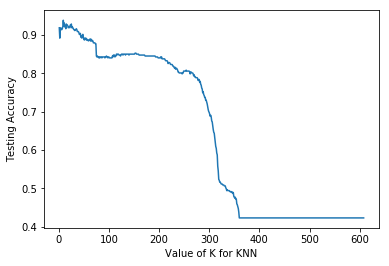

In [146]:
%matplotlib inline
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy') 

In [132]:
knn_final = KNeighborsClassifier(n_neighbors=9)
knn_final.fit(df_x_scaled, df_y_converted)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [133]:
x_new = DataFrame({'grade':[0,1.5,2.5,3.5,4.5],
                   'activity':[100,200,300,400,500],
                   'Coding':[0,1.5,2,3,4],
                   'Teamwork':[0,1,2,3,4],
                   'Math':[0,1,2,3,4]
                  })
x_new

,grade,activity,Coding,Teamwork,Math
0,0.0,100,0.0,0,0
1,1.5,200,1.5,1,1
2,2.5,300,2.0,2,2
3,3.5,400,3.0,3,3
4,4.5,500,4.0,4,4


In [134]:
x_new_scaled = (x_new - df_x.mean())/df_x.std()
x_new_scaled


,grade,activity,Coding,Teamwork,Math
0,-6.785459,-3.357978,-5.825491,-4.696438,-4.358580
1,-3.659681,-1.740872,-3.145111,-3.317991,-2.937528
2,-1.575828,-0.123766,-2.251651,-1.939544,-1.516476
3,0.508024,1.493340,-0.464731,-0.561097,-0.095424
4,2.591876,3.110446,1.322189,0.817351,1.325629


In [135]:
y_new_predict = knn_final.predict(x_new_scaled)
print(y_new_predict)

[0 5 3 4 1]
